# Mô tả tập dữ liệu
* loan_id – ID khoản vay, một mã duy nhất để nhận diện từng khoản vay.
* no_of_dependents – Số người phụ thuộc của người vay (ví dụ: con cái, cha mẹ, v.v.).
* education – Trình độ học vấn của người vay (ví dụ: "Graduate", "Not Graduate").
* self_employed – Người vay có tự kinh doanh hay không ("Yes" hoặc "No").
* income_annum – Thu nhập hàng năm của người vay (thường tính theo đơn vị tiền tệ cụ thể, ví dụ: USD).
* loan_amount – Số tiền vay.
* loan_term – Thời hạn khoản vay (có thể tính theo tháng hoặc năm).
* cibil_score – Điểm tín dụng CIBIL của người vay (thường trong khoảng 300 - 900, điểm càng cao càng tốt).
* residential_assets_value – Giá trị tài sản nhà ở của người vay.
* commercial_assets_value – Giá trị tài sản thương mại của người vay (ví dụ: mặt bằng kinh doanh).
* luxury_assets_value – Giá trị tài sản xa xỉ của người vay (xe hơi, du thuyền, v.v.).
* bank_asset_value – Tổng giá trị tài sản của người vay trong ngân hàng.
* loan_status – Trạng thái khoản vay (ví dụ: "Approved" - Được duyệt, "Rejected" - Bị từ chối).

### 1.Chuẩn bị các thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
import os
import joblib

### 2.Xử lý dữ liệu

In [2]:
df = pd.read_csv('../data/raw/loan.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [8]:
df[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

### 3.Trực quan hóa dữ liệu

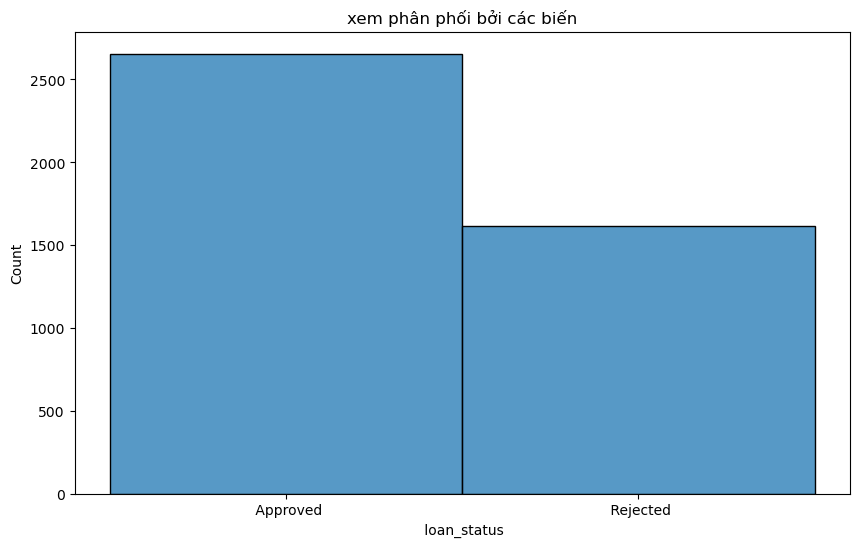

In [9]:
# vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[ ' loan_status'], bins=30,)
plt.title("xem phân phối bởi các biến")
plt.show()

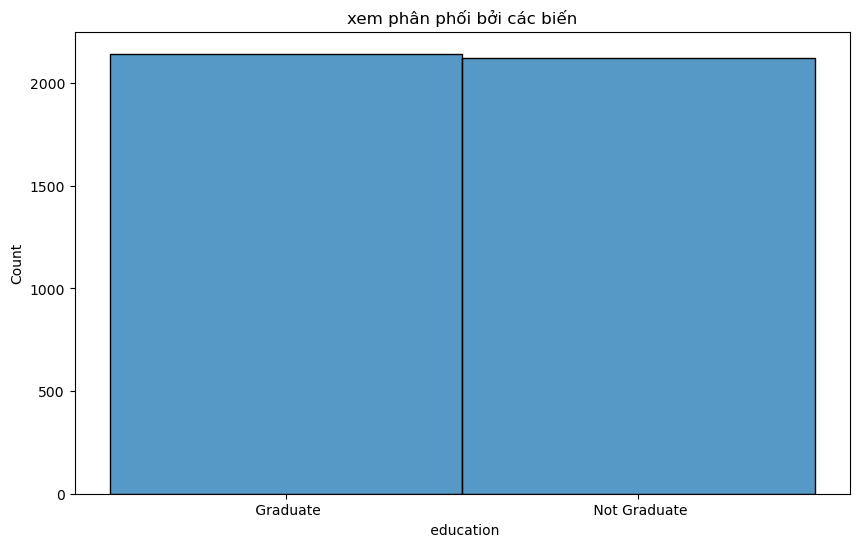

In [10]:
# vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[' education'], bins=30,)
plt.title("xem phân phối bởi các biến")
plt.show()

In [11]:
df[' loan_status'].value_counts(normalize=True)


 loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[' loan_status'] = le.fit_transform(df[' loan_status'])
df[' education'] = le.fit_transform(df[' education'])
df[' self_employed'] = le.fit_transform(df[' self_employed'])

In [13]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


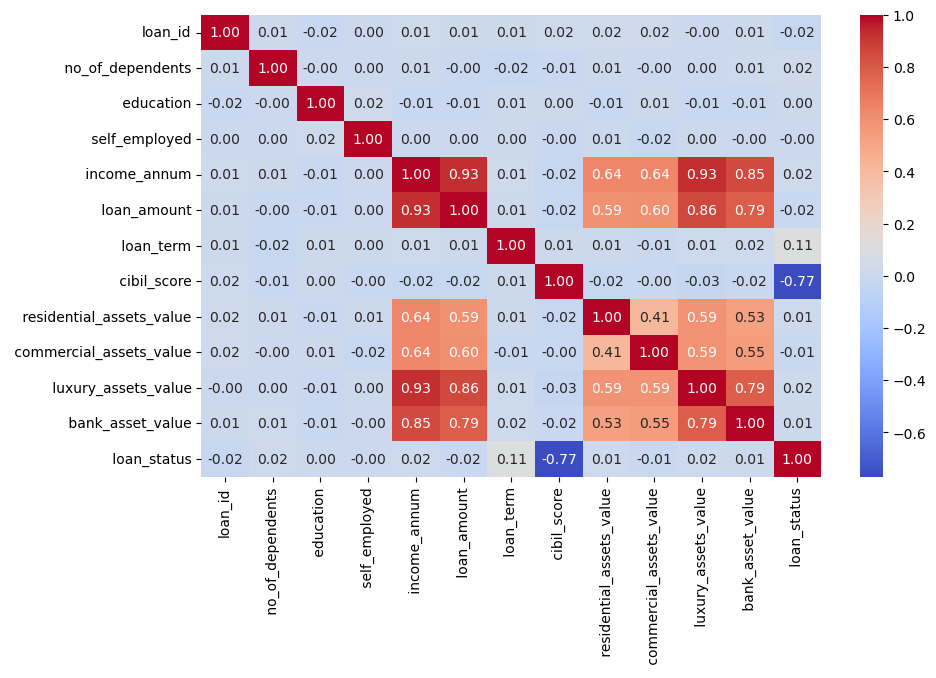

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### 4.Xây dựng mô hình dự đoán


In [15]:
# tách biến
X = df[[ ' loan_amount',' bank_asset_value',' residential_assets_value',' commercial_assets_value',' cibil_score'
       ]]
y = df[' loan_status']

In [16]:
#Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
#Khai báo sử dụng thuật toán cây quyết định:
from sklearn.tree import DecisionTreeClassifier

#Khai báo mô hình Cây quyết định - Sử dụng độ đo: Entropy:
Model_Tree_Job = DecisionTreeClassifier(criterion='entropy')

In [18]:
# Khởi tạo và huấn luyện mô hình Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

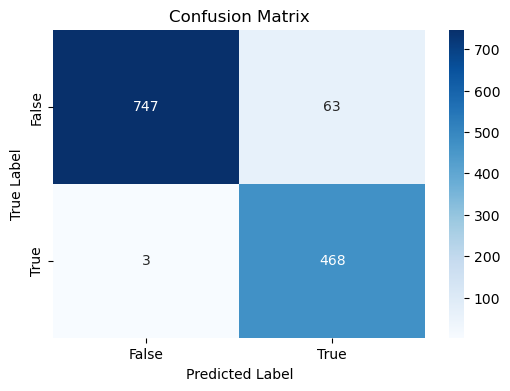

In [20]:

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:
# Đánh giá mô hình
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))

Độ chính xác (Accuracy): 0.9484777517564403


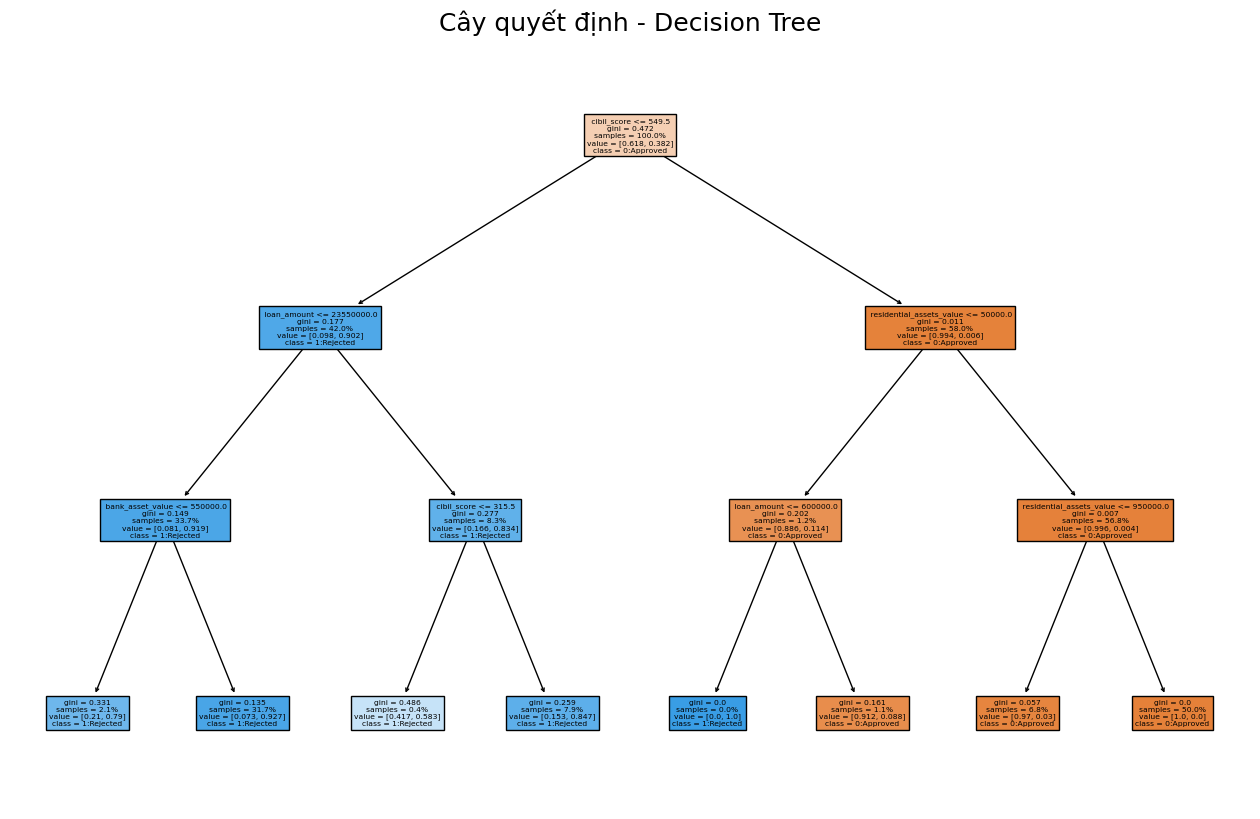

In [22]:

plt.figure(figsize=(16, 10))
tree.plot_tree(model, feature_names=X_train.columns, class_names=['0:Approved', '1:Rejected'], filled=True, proportion=True)
plt.title("Cây quyết định - Decision Tree", fontsize=18)
plt.show()


In [23]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")


Train Accuracy: 0.96
Test Accuracy: 0.95
